In [49]:
from IPython.display import Image

# Grover's Algorithm

Devised by Lov Grover in 1996, Gover's algorithm finds with high probability the unique input that produces a particular output value, using just $O(\sqrt(N))$ evaluations of the function, where $N$ is the size of the function's domain.

Using classical computation the same problem cannot be solved in fewer than $O(N)$ evaluations (because, in the worst case, the $N$-th member of the domain might be the correct member).

You can picture the algorithm in a context of a query in a database. With a Quantum computer, you would be able to find a given object in a database in $O(\sqrt(N))$ time. Using a traditional computer, the same operation would take $O(N)$ time. The quantum-computer is therefore exponentially faster than a traditional computer.

Let us look at a problem in classical computing. Here we have a list of numbers with length N. 

![My Title](../images/grover/NormalDB.jpg)

In this case we are trying to find the figure 8. Given a function F we want to give a number "t" as input so as f(t) = 8. 

![My Title](../images/grover/SortedArray.jpg)

In classical computing there are several ways of doing this. One way is linar search which takes $O(N)$ time.

![My Title](../images/grover/LinearSearch.jpg)

Another more optimised way is the binary search, which in turn takes $O(log_n)$ time.

![My Title](../images/grover/BinarySearch.jpg)

But what if we have an unsorted array, and we want to do it even faster?

![My Title](../images/grover/UnsortedArray.jpg)

Before we start programming a real quantum computer, we first need to make sure we have all the tools needed.
Below are a few scripts that you should run in order to download before mentioned tools.
Click the box below and press the "Run" button, located at the top of this notebook.

In [3]:
#import pip
#!pip install qiskit
#!pip install matplotlib
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

To make quantum computations, we first need to create a quantum circuit.

If you followed the instructions above, you should now know how to run a script in Jupyter. Go ahead and run the next script as well, located below this message:

In [4]:
# Create a Quantum Register with 3 qubits.
qr = QuantumRegister(3,'q1')
# We also need to create a classical register to measure our values
cr = ClassicalRegister(3)
# Create a Quantum Circuit, combining our two registers.
circ = QuantumCircuit(qr,cr)

By running the two previous scripts, you should now have 1.) installed the tools needed to proceed in this notebook, 2.) have created a quantum- and a classical-register.
By running the next script, you will be able to see if everything got installed correctly. The output should be a printout of all our newly created registers:

q1_0: |0>
         
q1_1: |0>
         
q1_2: |0>
         
 c2_0: 0 
         
 c2_1: 0 
         
 c2_2: 0 

In [5]:
circ.draw()

# Oracle function

The oracle funtion is a sort of computer. It operates concurently on a certain amount of quibits which are given as an input and returned after a sat amount of time. 

In [6]:
#Init
circ.h(qr)
circ.barrier()

#Oracle operator for binary 110
circ.x(qr[0])
circ.h(qr[2])
circ.ccx(qr[0],qr[1],qr[2])
circ.x(qr[0])
circ.h(qr[2])
circ.barrier()


#Measure
circ.measure(qr,cr)

#Prepare draw
circ.draw();

We can then implement Grover's algorithm.

In [7]:
#Grover
circ.h(qr)
circ.x(qr)
circ.h(qr[2])
circ.ccx(qr[0],qr[1],qr[2])
circ.h(qr[2])
circ.x(qr)
circ.h(qr)
circ.barrier()


And then we are able to draw the output

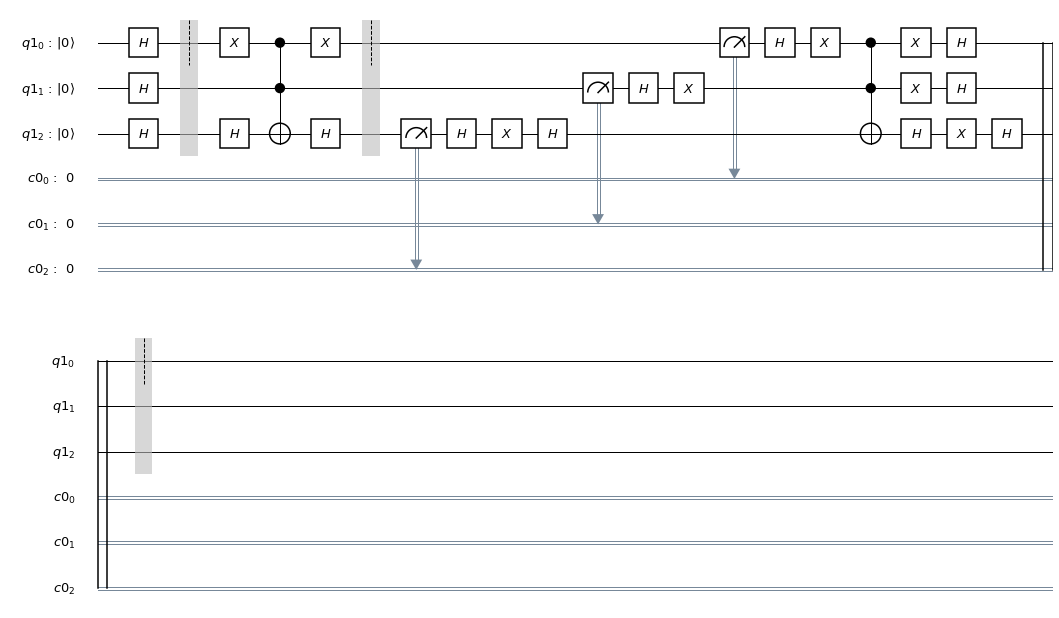

In [8]:
circ.draw(output='mpl')

# Running Grover' algorithm on a Quantum Simulator

Running algorithms on a quantum computer can be very time consuming, depending on the time in which you do it. 
Therefor we suggest that you run your algorithm on a simulater to see the results, and then if you have time to wait, run it on a Quantum Computer.

In [9]:
from qiskit import execute, IBMQ
from qiskit.tools.visualization import plot_histogram

In [ ]:
IBMQ.load_accounts()
#backend = Aer.get_backend('qasm_simulator')
#IBMQ.backends()
device = IBMQ.get_backend('ibmq_qasm_simulator')
result = execute(circ, device ,shots=1024).result()

/Users/jacob/anaconda/lib/python3.5/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [ ]:
counts = result.get_counts(circ)

In [ ]:
plot_histogram(counts)

# Running Grovers algorithm on a Quantum Computer

In [6]:
from qiskit import IBMQ
#%run credentials.py
# We now save the account so we can use it with IBMQ
#IBMQ.save_account("de8b458767c048db841ebbbc7a7b1bb2a4004c5086812ca496261e6b89f02653814ae8f1db62e5108cd86a2edb6630d101a4df03ab6526de8c7fa55129c5770f")
# And now we register which account we are using.
IBMQ.load_accounts()

In [44]:
from qiskit.providers.ibmq import least_busy

device = least_busy(IBMQ.backends())
#device = IBMQ.get_backend('ibmq_16_melbourne')

In [45]:
# We excecute the job on the choosen device
job_sim = execute(circ, device,shots=1024)

In [46]:
# The job monitor makes it possible for us to monitor our job in real time
from qiskit.tools.monitor import job_monitor
job_monitor(job_sim, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [9]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(circ)

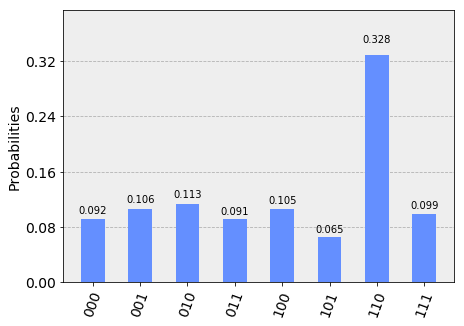

In [10]:
plot_histogram(counts)

In [11]:
counts

{'011': 93,
 '010': 116,
 '101': 67,
 '110': 336,
 '111': 101,
 '100': 108,
 '000': 94,
 '001': 109}